In [1]:
import seizure_detection_simple

data = seizure_detection_simple.doload('Dog_1', False, False)

Reading from clips/Dog_1/ 596 596


In [2]:
data

<class 'pandas.core.panel.Panel'>
Dimensions: 596 (items) x 400 (major_axis) x 17 (minor_axis)
Items axis: ictal_1 to interictal_99
Major_axis axis: 0 to 399
Minor_axis axis: 0 to time

In [3]:
data.keys()

Index(['ictal_1', 'ictal_10', 'ictal_100', 'ictal_101', 'ictal_102',
       'ictal_103', 'ictal_104', 'ictal_105', 'ictal_106', 'ictal_107',
       ...
       'interictal_90', 'interictal_91', 'interictal_92', 'interictal_93',
       'interictal_94', 'interictal_95', 'interictal_96', 'interictal_97',
       'interictal_98', 'interictal_99'],
      dtype='object', length=596)

In [4]:
data['ictal_1'].keys()

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'time'], dtype='object')

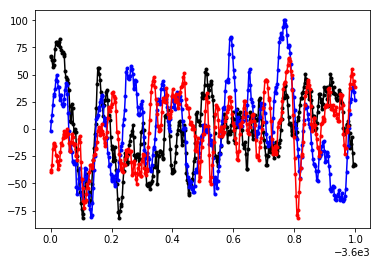

In [5]:
seizure_detection_simple.plot(data)

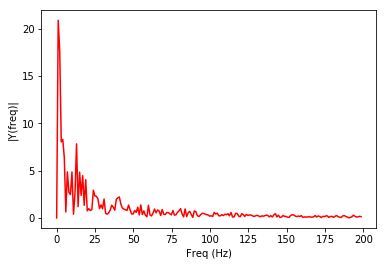

In [6]:
seizure_detection_simple.plotSpectrum(data['ictal_1'][0], 399)

In [7]:
import numpy as np

def fft(time_data):
    return np.log10(np.absolute(np.fft.rfft(time_data, axis=1)[:,1:48]))


## Step 1.3

In [30]:
from sklearn.model_selection import train_test_split

x_data = []
y_data = []



for seg in data:
    spec = fft(np.transpose(data[seg]))
    x_data.append(np.reshape(spec, -1))
    y_data.append("interictal" not in seg)
    


In [31]:
# Create X_train, X_test, y_train, y_test with
# random_state = 42 and test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)



## Step 1.4 Best Result

In [64]:
## Produce your best output here!
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

mms = MinMaxScaler()
mms.fit(X_train)
X_scaled = mms.transform(X_train)
mms2 = MinMaxScaler()
mms2.fit(X_test)
X_test_scaled = mms2.transform(X_test)



rfc = RandomForestClassifier(n_estimators = 7)
    
rfc.fit(X_scaled, y_train)
rfc.score(X_test_scaled, y_test)

# scores = []

# for num in range(1,20):
#     rfc = RandomForestClassifier(n_estimators = num)
    
#     rfc.fit(X_scaled, y_train)
#     scores.append(rfc.score(X_test_scaled, y_test))
    
    
# n_estimators = range(1,20)[np.argmax(scores)]

# max(scores)



1.0

In [45]:
n_estimators = range(1,20)


In [57]:
X_test_scaled

array([[0.52638183, 0.62627468, 0.40638036, ..., 0.        , 1.        ,
        1.        ],
       [0.76131914, 0.79226606, 0.76155063, ..., 0.        , 1.        ,
        1.        ],
       [0.47082401, 0.45456723, 0.35858481, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.55441375, 0.4809786 , 0.55353393, ..., 0.        , 1.        ,
        1.        ],
       [0.74689339, 0.54509631, 0.67785298, ..., 0.98657227, 0.01550293,
        0.0324707 ],
       [0.27160312, 0.37496801, 0.1282159 , ..., 0.        , 1.        ,
        1.        ]])

In [68]:
np.shape(x_data)

(596, 799)